In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm 
%matplotlib inline

In [2]:
import os
os.chdir('C:\\Users\\WELCOME\\Downloads\\PYTHON FILES\\Advanced statistics\\PROJECT')

In [3]:
df_fever=pd.read_csv('Fever-1.csv')

In [4]:
df_fever.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [5]:
df_fever.shape

(36, 4)

In [6]:
df_fever.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [7]:
df_fever.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

In [8]:
dups = df_fever.duplicated()
dups.sum()

0

In [9]:
df_fever.describe(include = 'all')

,A,B,Volunteer,Relief
count,36.000000,36.000000,36.000000,36.000000
mean,2.000000,2.000000,2.500000,7.183333
std,0.828079,0.828079,1.133893,3.272090
min,1.000000,1.000000,1.000000,2.300000
25%,1.000000,1.000000,1.750000,4.675000
50%,2.000000,2.000000,2.500000,6.000000
75%,3.000000,3.000000,3.250000,9.325000
max,3.000000,3.000000,4.000000,13.500000


### 1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually

The one way ANOVA compares the means between the groups and determines whether any of the means are significantly different from each other.
The ANOVA states that at least two group means are significantly different from each other.
We are using one-way ANOVA to understand whether the relief hours differed based on active components of ‘A’ and ‘B’
### H0: µ1 = µ2 = µ3 (The mean relief hours are equal with different levels of A)
### Ha: Not all of the means are equal.
#### Significance Level α = 0.05
### H0: µ1 = µ2 = µ3 (The mean relief hours are equal with different levels of B)
 ### Ha: Not all of the means are equal.
#### Significance Level α = 0.05


### 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [10]:
df_fever['A'] = pd.Categorical(df_fever['A'])

In [11]:
df_fever['A'].value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

In [12]:
formula = 'Relief ~ C(A)'
model = ols(formula, df_fever).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


Since the p value is less than the significance level, we can reject the null hypothesis and states that there is a difference in the mean of relief hours with different levels of A

### 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [13]:
df_fever['B']= pd.Categorical(df_fever['B'])

In [14]:
df_fever['B'].value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

In [15]:
formula = 'Relief ~ C(B)'
model = ols(formula, df_fever).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


Since the p value is less than the significance level, we can reject the null hupothesis and states that there is a difference in the mean of relief hours with different levels of B

### 1.4) Analyse the effects of one variable on another with the help of an interaction plot.
### What is the interaction between the two treatments?
#### [hint: use the ‘pointplot’ function from the ‘seaborn’ function]

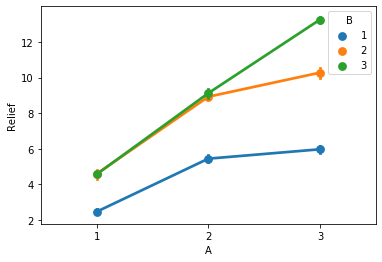

In [22]:
sns.pointplot(x='A', y='Relief', data=df_fever,  hue='B');


As we see from the interaction plots, there seems to be interaction amongst the two variables. we could there is a interaction between variables A and B 

### 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’ along with their interaction 'A*B') with the variable 'Relief' and state your results.

𝐻0  : The means of 'Relief' variable with respect to variable A and B is equal.

𝐻1  : At least one of the means of 'Relief' variable with respect variable A and B is unequal

In [20]:
model=ols('Relief~C(A)+C(B)+C(A):C(B)',data=df_fever).fit()
aov_table=anova_lm(model)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


Considering both the variable (A and B), A is a significant factor as the p value is <0.05 wheras B is also significant variable as p value of diet is >0.05

As A and B interaction is 6.972083e-17 which is < 0.05 , there seems to be statistical interaction.

### 1.6) Mention the business implications of performing ANOVA for this particular case study.

This business case problem is about developing a new compound for the relief of hay fever, the compound contains two active ingredients A and B that is varied at three different levels. A total of nine treatments and by using randomization four volunteers are assigned to each of nine treatments. The reason for performing ANOVA for this business case is that to find out the means are same or at least one pair of means are the same. (i.e.) would be the null and alternate hypothesis for this case. In this business case we have used to ONE-WAY ANOVA for A and B, We have also performed TWO-WAY ANOVA WITH INTERACTION EFFECT between the variables, the reason for using two-way is that we need a quantitative output value and you have two or more categorical variables in your case. The interaction plot has significantly made us understand that there is interaction between the variable A and B with respect to relief variable so performing two-way helps us to conclude that in a statistical way. Considering the interaction value which is less than P value which proves us that there is interaction between the variable A and B which significantly affects the relief hours of nine different treatments among the volunteers. 

 ### END